<a href="https://colab.research.google.com/github/KambhampatiAdvaith/Codsoft/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
import pandas as pd

df = pd.read_csv("Churn_Modelling.csv")

df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])


label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)


X = df.drop(columns=["Exited"])
y = df["Exited"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)
print("Logistic Regression:\n", classification_report(y_test, log_preds))


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, rf_preds))


gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
print("Gradient Boosting:\n", classification_report(y_test, gb_preds))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Gradient Boosting:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg    

In [7]:
from sklearn.model_selection import GridSearchCV


rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='recall', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)


print("Best Parameters for Random Forest:", rf_grid_search.best_params_)


gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}


gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=3, scoring='recall', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print("Best Parameters for Gradient Boosting:", gb_grid_search.best_params_)


Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [8]:

best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42
)
best_rf_model.fit(X_train, y_train)
rf_preds_best = best_rf_model.predict(X_test)

best_gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=5,
    min_samples_split=2,
    random_state=42
)
best_gb_model.fit(X_train, y_train)
gb_preds_best = best_gb_model.predict(X_test)


from sklearn.metrics import classification_report

print("Optimized Random Forest:\n", classification_report(y_test, rf_preds_best))
print("Optimized Gradient Boosting:\n", classification_report(y_test, gb_preds_best))


Optimized Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90      1607
           1       0.57      0.69      0.63       393

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000

Optimized Gradient Boosting:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.86      0.86      0.86      2000



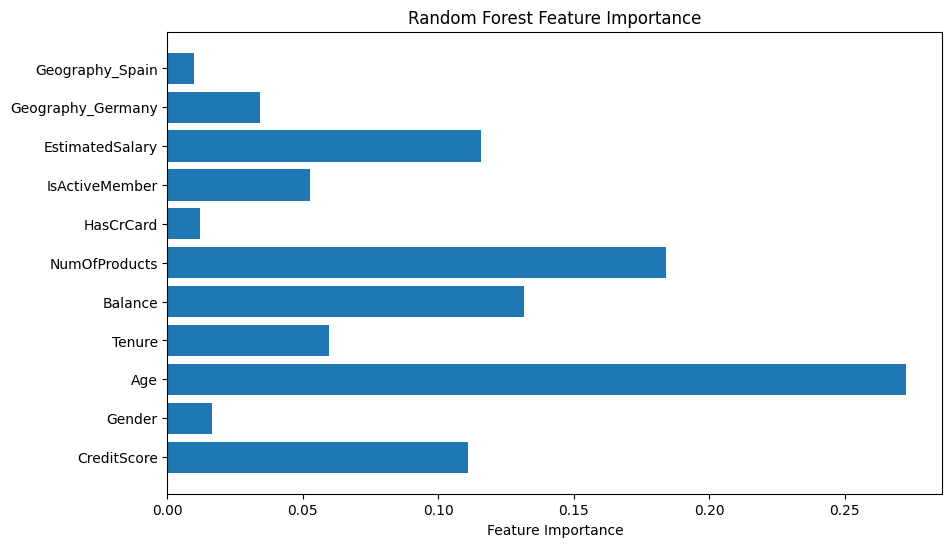

In [14]:
import matplotlib.pyplot as plt


importances = best_rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()



In [17]:
from sklearn.metrics import classification_report, accuracy_score


rf_preds = rf_grid_search.best_estimator_.predict(X_test)
gb_preds = gb_grid_search.best_estimator_.predict(X_test)


print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_preds))

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90      1607
           1       0.57      0.69      0.63       393

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.86      0.86      0.86      2000

Random Forest Accuracy: 0.8385
Gradient Boosting Accuracy: 0.8645


In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


rf_grid_search.best_estimator_.fit(X_train_smote, y_train_smote)
gb_grid_search.best_estimator_.fit(X_train_smote, y_train_smote)


GradientBoostingClassifier(learning_rate=0.2, max_depth=5, random_state=42)

In [18]:
import joblib

joblib.dump(rf_grid_search.best_estimator_, 'random_forest_churn.pkl')
joblib.dump(gb_grid_search.best_estimator_, 'gradient_boosting_churn.pkl')


['gradient_boosting_churn.pkl']

In [20]:
rf_model = joblib.load('random_forest_churn.pkl')
gb_model = joblib.load('gradient_boosting_churn.pkl')




In [22]:
rf_preds = rf_grid_search.best_estimator_.predict(X_test)
gb_preds = gb_grid_search.best_estimator_.predict(X_test)

print("Random Forest Predictions:", rf_preds)
print("Gradient Boosting Predictions:", gb_preds)


Random Forest Predictions: [0 0 1 ... 1 0 0]
Gradient Boosting Predictions: [0 0 1 ... 1 0 0]


In [24]:
print(X_train.columns)



Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')


In [25]:
print(X_train.head())
print(X_test.head())


      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
9254          686       1   32       6       0.00              2          1   
1561          632       1   42       4  119624.60              2          1   
1670          559       1   24       3  114739.92              1          1   
6087          561       0   27       9  135637.00              1          1   
6669          517       1   56       9  142147.32              1          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  
9254               1        179093.26              False            False  
1561               1        195978.86               True            False  
1670               0         85891.02              False             True  
6087               0        153080.40              False            False  
6669               0         39488.04              False            False  
      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  Has

In [27]:
new_customer_data = [X_test.iloc[0].values]

rf_prediction = rf_grid_search.best_estimator_.predict(new_customer_data)
gb_prediction = gb_grid_search.best_estimator_.predict(new_customer_data)

print("Random Forest Churn Prediction:", rf_prediction)
print("Gradient Boosting Churn Prediction:", gb_prediction)




Random Forest Churn Prediction: [0]
Gradient Boosting Churn Prediction: [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


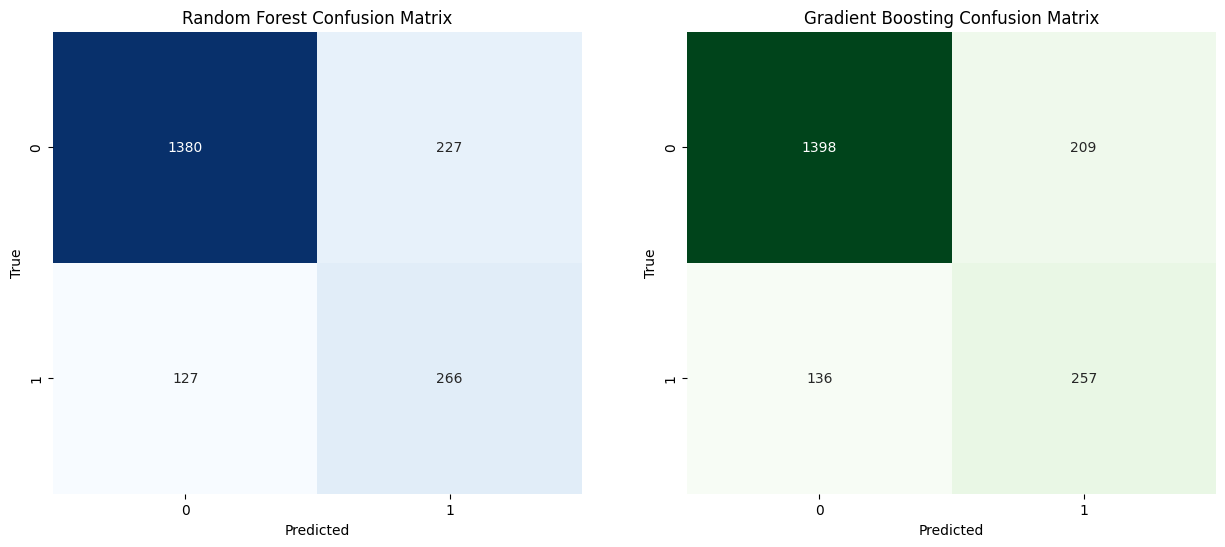

In [28]:

rf_preds = rf_grid_search.best_estimator_.predict(X_test)
gb_preds = gb_grid_search.best_estimator_.predict(X_test)


from sklearn.metrics import confusion_matrix
import seaborn as sns


rf_cm = confusion_matrix(y_test, rf_preds)
gb_cm = confusion_matrix(y_test, gb_preds)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
ax[0].set_title('Random Forest Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Greens', ax=ax[1], cbar=False)
ax[1].set_title('Gradient Boosting Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.show()


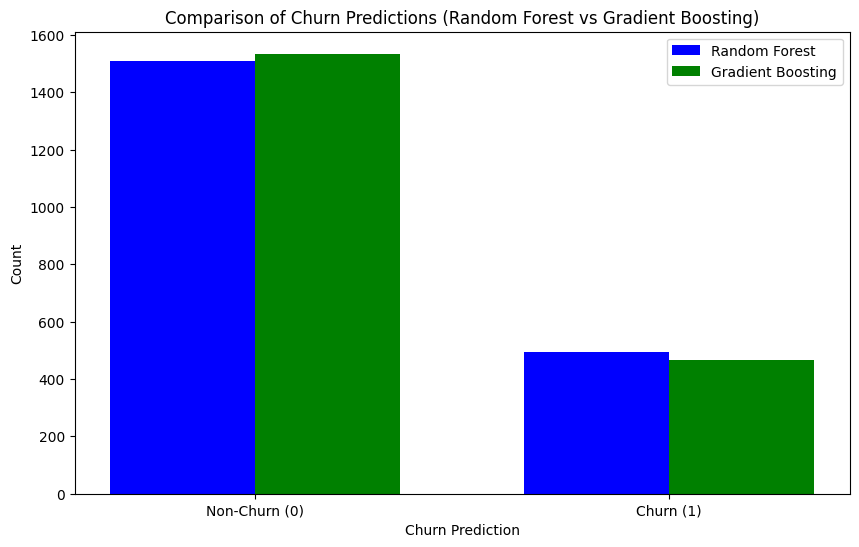

In [29]:
import matplotlib.pyplot as plt


rf_churn_count = [sum(rf_preds == 0), sum(rf_preds == 1)]
gb_churn_count = [sum(gb_preds == 0), sum(gb_preds == 1)]

labels = ['Non-Churn (0)', 'Churn (1)']

fig, ax = plt.subplots(figsize=(10,6))
width = 0.35
x = range(2)


ax.bar(x, rf_churn_count, width, label='Random Forest', color='blue')
ax.bar([p + width for p in x], gb_churn_count, width, label='Gradient Boosting', color='green')

ax.set_xlabel('Churn Prediction')
ax.set_ylabel('Count')
ax.set_title('Comparison of Churn Predictions (Random Forest vs Gradient Boosting)')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()
